In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string

In [5]:
train = pd.read_csv('/home/joaquin/Desktop/Datos/tp1/train.csv')
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [8]:
train['punctuation_count'] = train['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
train.head()

,id,keyword,location,text,target,punctuation_count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,3
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,2
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,2


In [12]:
disaster_tweets = train.loc[train['target'] == 1,['target','punctuation_count']]
non_disaster_tweets = train.loc[train['target'] == 0,['target','punctuation_count']]

#disaster_tweets.describe()
#non_disaster_tweets.describe()

,target,punctuation_count
count,4342.0,4342.000000
mean,0.0,6.309074
std,0.0,4.830297
min,0.0,0.000000
25%,0.0,3.000000
50%,0.0,6.000000
75%,0.0,9.000000
max,0.0,61.000000


<function matplotlib.pyplot.show(*args, **kw)>

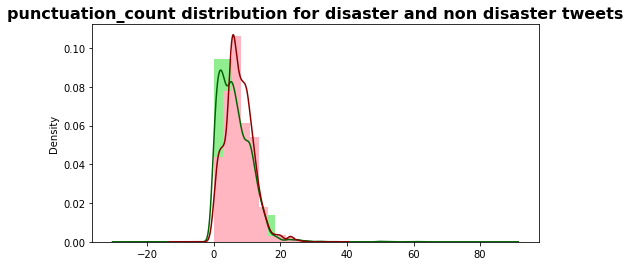

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)

plt.title('punctuation_count distribution for disaster and non disaster tweets', fontsize=16, fontweight='bold')
ax.set_label('punctuation_count')

non_disaster_tweets['punctuation_count'].plot.hist(color='lightgreen', figsize=(8,4), density = True, label='non disaster tweets')
non_disaster_tweets['punctuation_count'].plot.kde(color='darkgreen', figsize=(8,4))

disaster_tweets['punctuation_count'].plot.hist(color='lightpink', figsize=(8,4), density = True)
disaster_tweets['punctuation_count'].plot.kde(color='darkred', figsize=(8,4))

plt.show